# Importing Modules

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Downloads\MSFT (1).csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060396,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062553,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063632,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062014,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060936,47894400
...,...,...,...,...,...,...,...
9440,2023-08-28,325.660004,326.149994,321.720001,323.700012,323.700012,14808500
9441,2023-08-29,321.880005,328.980011,321.880005,328.410004,328.410004,19284600
9442,2023-08-30,328.670013,329.809998,326.450012,328.790009,328.790009,15222100
9443,2023-08-31,329.200012,330.910004,326.779999,327.760010,327.760010,26411000


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

# Extraction of Relevant Data for stock prediction

For the purpose of our stock prediction model, we are primarily concerned with the stock's closing price over time. The closing price of a stock is crucial because it reflects the final consensus of value for that stock at the end of a trading day. As a result, it can be seen as a summation of all the trading activities of that day.

Given our dataset has multiple attributes such as Date, Open, High, Low, Close, Adj Close, and Volume, we have decided to extract only the Date and Close columns for simplicity and relevance.

The Date column provides a timestamp for each data entry, ensuring that we can track the temporal progression of the stock prices. The Close column, as previously mentioned, offers a daily summary of the stock's value.

In [5]:
df=df[['Date','Close']]
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9440,2023-08-28,323.700012
9441,2023-08-29,328.410004
9442,2023-08-30,328.790009
9443,2023-08-31,327.760010


In [7]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9440    2023-08-28
9441    2023-08-29
9442    2023-08-30
9443    2023-08-31
9444    2023-09-01
Name: Date, Length: 9445, dtype: object

# Conversion of Date Data Type for Time-Series Analysis

In our dataset, the Date column was initially of object data type, likely representing dates as strings. For meaningful analysis, especially when dealing with time-series data, it's paramount to convert this object data type into a datetime format.

In [7]:
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

In [8]:
df['Date'] = df['Date'].apply(str_to_datetime)

C:\Users\DELL\AppData\Local\Temp\ipykernel_17124\3172778012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


In [9]:
df['Date']

0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9440   2023-08-28
9441   2023-08-29
9442   2023-08-30
9443   2023-08-31
9444   2023-09-01
Name: Date, Length: 9445, dtype: datetime64[ns]

In [10]:
df.index=df.pop('Date')

In [11]:
df


,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-08-28,323.700012
2023-08-29,328.410004
2023-08-30,328.790009


# Visualizing Stock Price Trends with plt.plot()



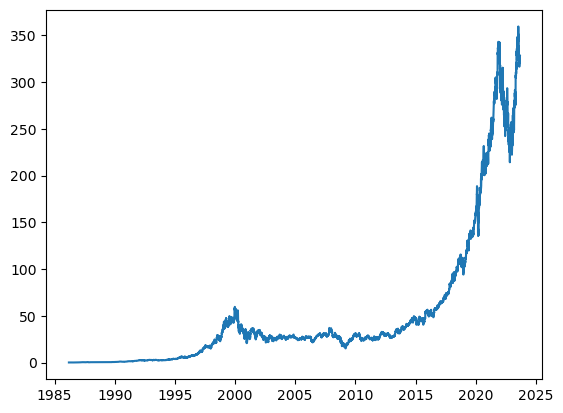

In [13]:
plt.plot(df.index,df['Close'])

rom 2016, the stock price began a steep ascent. Approaching 2021, the stock saw an even sharper rise. However, shortly after, there was a noticeable dip, followed by a subsequent increase. This period, from 2016 to 2021, highlights a dynamic phase of growth, a brief downturn, and a resilient recovery.

In [14]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [15]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

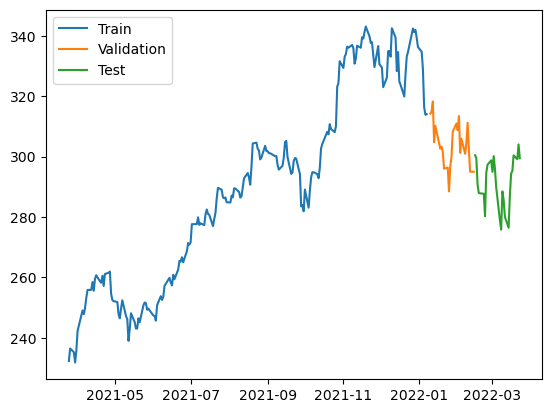

In [16]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 2s 67ms/step - loss: 84616.3750 - mean_absolute_error: 289.1479 - val_loss: 92341.4766 - val_mean_absolute_error: 303.7903
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 84433.0781 - mean_absolute_error: 288.8290 - val_loss: 92151.7031 - val_mean_absolute_error: 303.4777
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 84240.6797 - mean_absolute_error: 288.4971 - val_loss: 91908.0781 - val_mean_absolute_error: 303.0761
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 83949.9531 - mean_absolute_error: 287.9912 - val_loss: 91491.2578 - val_mean_absolute_error: 302.3877
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 83502.7891 - mean_absolute_error: 287.2151 - val_loss: 90950.9609 - val_mean_absolute_error: 301.4930
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 82965.0625 - mean_absolute_error: 286.2786 - val_loss: 90309.

Epoch 49/100
7/7 [==============================] - 0s 9ms/step - loss: 1008.3619 - mean_absolute_error: 26.8374 - val_loss: 278.1034 - val_mean_absolute_error: 15.0710
Epoch 50/100
7/7 [==============================] - 0s 9ms/step - loss: 997.3666 - mean_absolute_error: 26.6510 - val_loss: 293.8605 - val_mean_absolute_error: 15.5524
Epoch 51/100
7/7 [==============================] - 0s 8ms/step - loss: 985.7884 - mean_absolute_error: 26.5454 - val_loss: 275.5229 - val_mean_absolute_error: 15.0004
Epoch 52/100
7/7 [==============================] - 0s 9ms/step - loss: 967.5665 - mean_absolute_error: 26.3237 - val_loss: 366.3034 - val_mean_absolute_error: 17.7680
Epoch 53/100
7/7 [==============================] - 0s 8ms/step - loss: 949.8062 - mean_absolute_error: 26.0718 - val_loss: 233.5895 - val_mean_absolute_error: 13.6621
Epoch 54/100
7/7 [==============================] - 0s 8ms/step - loss: 942.4503 - mean_absolute_error: 25.9526 - val_loss: 321.0554 - val_mean_absolute_error:

7/7 [==============================] - 0s 2ms/step


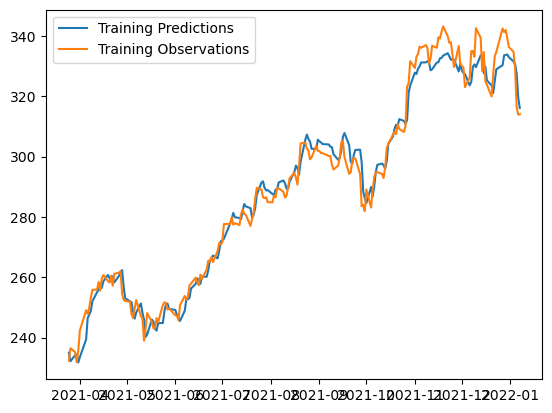

In [18]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 32ms/step


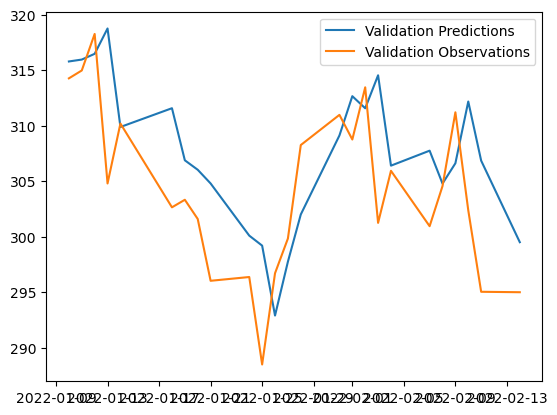

In [19]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 27ms/step


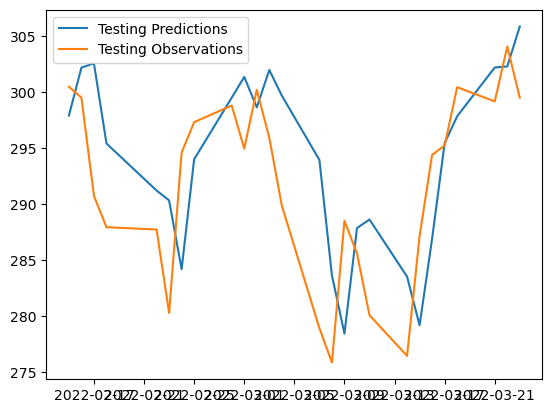

In [20]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

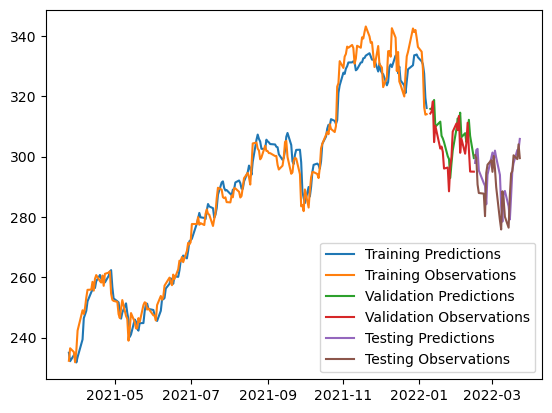

In [21]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [22]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 24ms/step


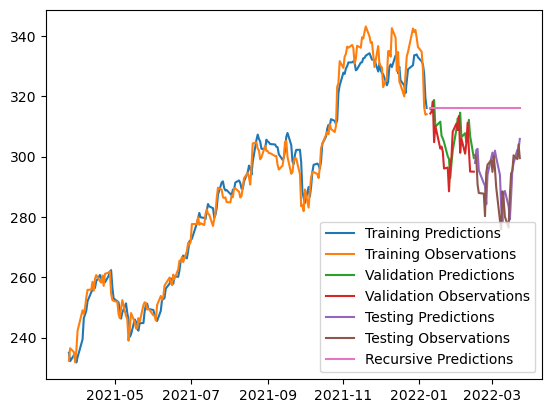

In [23]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])